## Importing the libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, SGDRegressor,Lasso
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import math
from sklearn.preprocessing import PolynomialFeatures

## Importing Dataset and visulize it

In [100]:
df = pd.read_csv('HOME_PRICE.csv')
df= df.loc[:,~df.columns.str.contains('^Unnamed: 0')]
df.head()

,Property_Type,Meterage,Price,price_(square_meter),Area,Year_of_construction,Bedrooms,Direction_of_the_building,Type_of_Document,Floor,...,Cooling,Heating,Hot_water,Date_of_Release,latitude,longitude,site,Elevator,Warehouse,Parking
0,Apateman,136.0,"12,500,000,000","91,900,000",امیرآباد تهران,1401.0,3.0,North,True,4.0,...,Water Cooler,Duct Split,package,4 last week,35.733903,51.394386,https://shabesh.com/,1,1,1
1,Apateman,108.0,"7,500,000,000","69,400,000",دولت تهران,1383.0,2.0,North,True,2.0,...,Water Cooler,heating,Powerhouse,3 last week,35.780815,51.450526,https://shabesh.com/,0,1,1
2,Apateman,71.0,"4,900,000,000","69,000,000",جنت آباد مرکزی تهران,1397.0,2.0,North,True,1.0,...,Water Cooler,heating,package,3 last week,35.758078,51.301245,https://shabesh.com/,1,1,1
3,Apateman,135.0,"13,500,000,000","100,000,000",امیرآباد تهران,1401.0,3.0,South,True,2.0,...,Water Cooler,Duct Split,package,4 last week,35.738292,51.398549,https://shabesh.com/,1,1,1
4,Apateman,117.0,"9,200,000,000","78,600,000",یوسف آباد تهران,1394.0,2.0,South,True,4.0,...,Water Cooler,heating,package,3 last week,35.735418,51.400867,https://shabesh.com/,1,1,1


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603 entries, 0 to 5602
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_Type              5603 non-null   object 
 1   Meterage                   5603 non-null   float64
 2   Price                      5603 non-null   object 
 3   price_(square_meter)       5603 non-null   object 
 4   Area                       5603 non-null   object 
 5   Year_of_construction       5603 non-null   float64
 6   Bedrooms                   5603 non-null   float64
 7   Direction_of_the_building  5603 non-null   object 
 8   Type_of_Document           5603 non-null   bool   
 9   Floor                      5603 non-null   float64
 10  Number_of_floors           5603 non-null   float64
 11  W.C                        5603 non-null   object 
 12  Number_of_floor_units      5603 non-null   float64
 13  Floor_type                 5603 non-null   objec

In [102]:
df.rename(columns={'price_(square_meter)':'Price_meter'}, inplace=True)

In [103]:
df["Price_meter"] = df["Price_meter"].str.replace(',', '')

In [104]:
df['Price_meter'] = df['Price_meter'].astype(float)


In [105]:
df=df.drop(['Property_Type',"Area",'Floor_type','Price','Cooling','Direction_of_the_building','Type_of_Document','Heating','Hot_water','site','W.C','Nama','Date_of_Release'],axis=1)
df.head()

,Meterage,Price_meter,Year_of_construction,Bedrooms,Floor,Number_of_floors,Number_of_floor_units,latitude,longitude,Elevator,Warehouse,Parking
0,136.0,91900000.0,1401.0,3.0,4.0,5.0,1.0,35.733903,51.394386,1,1,1
1,108.0,69400000.0,1383.0,2.0,2.0,4.0,1.0,35.780815,51.450526,0,1,1
2,71.0,69000000.0,1397.0,2.0,1.0,5.0,3.0,35.758078,51.301245,1,1,1
3,135.0,100000000.0,1401.0,3.0,2.0,5.0,2.0,35.738292,51.398549,1,1,1
4,117.0,78600000.0,1394.0,2.0,4.0,5.0,2.0,35.735418,51.400867,1,1,1


# ONEHOTEENCODER

In [106]:
from sklearn.preprocessing import OneHotEncoder

In [107]:
df['Price_meter'].sort_values(ascending=True)

4195      6100000.0
3765      6800000.0
3998      7500000.0
4407      7700000.0
5389      8100000.0
           ...     
4203    450000000.0
3264    450000000.0
3222    500000000.0
3741    500000000.0
4371    500000000.0
Name: Price_meter, Length: 5603, dtype: float64

In [42]:
# plt.figure(figsize=(10,5))
# plt.xticks(rotation=45)
# sns.boxplot(data=df)
# plt.show()

In [43]:
# cols = ["Price_meter"]
# q1=df.quantile(0.01)

# q3=df.quantile(0.75)

# IQR=q3-q1

# df = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
# df.describe()

In [108]:
def get_num_people_by_age_category(df):
    df["Price_group"] = pd.cut(x=df['Price_meter'], bins=[5000000,50000000,80000000,100000000,150000000,500000000], labels=["Very_cheap","Cheap","middle_Price","Expencive","Very_Expensive"])
    return df

# Call function
df = get_num_people_by_age_category(df)
df.head()


,Meterage,Price_meter,Year_of_construction,Bedrooms,Floor,Number_of_floors,Number_of_floor_units,latitude,longitude,Elevator,Warehouse,Parking,Price_group
0,136.0,91900000.0,1401.0,3.0,4.0,5.0,1.0,35.733903,51.394386,1,1,1,middle_Price
1,108.0,69400000.0,1383.0,2.0,2.0,4.0,1.0,35.780815,51.450526,0,1,1,Cheap
2,71.0,69000000.0,1397.0,2.0,1.0,5.0,3.0,35.758078,51.301245,1,1,1,Cheap
3,135.0,100000000.0,1401.0,3.0,2.0,5.0,2.0,35.738292,51.398549,1,1,1,middle_Price
4,117.0,78600000.0,1394.0,2.0,4.0,5.0,2.0,35.735418,51.400867,1,1,1,Cheap


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603 entries, 0 to 5602
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Meterage               5603 non-null   float64 
 1   Price_meter            5603 non-null   float64 
 2   Year_of_construction   5603 non-null   float64 
 3   Bedrooms               5603 non-null   float64 
 4   Floor                  5603 non-null   float64 
 5   Number_of_floors       5603 non-null   float64 
 6   Number_of_floor_units  5603 non-null   float64 
 7   latitude               5603 non-null   float64 
 8   longitude              5603 non-null   float64 
 9   Elevator               5603 non-null   int64   
 10  Warehouse              5603 non-null   int64   
 11  Parking                5603 non-null   int64   
 12  Price_group            5603 non-null   category
dtypes: category(1), float64(9), int64(3)
memory usage: 531.1 KB


In [110]:
df.columns = df.columns.astype(str)

In [111]:
 
s =df.dtypes == 'category'
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

Categorical variables:
['Price_group']
No. of. categorical features:  1


In [112]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
# OH_cols.columns = OH_encoder.get_feature_names()
df_final = df.drop(object_cols, axis=1)
df= pd.concat([df_final, OH_cols], axis=1)

/home/sara/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [49]:
# df['group'] = pd.cut(df['Price_meter'],5, labels=False)
# df.head(60)

In [113]:
df.isnull().sum()

Meterage                 0
Price_meter              0
Year_of_construction     0
Bedrooms                 0
Floor                    0
Number_of_floors         0
Number_of_floor_units    0
latitude                 0
longitude                0
Elevator                 0
Warehouse                0
Parking                  0
0                        0
1                        0
2                        0
3                        0
4                        0
dtype: int64

In [115]:
df.columns = df.columns.astype(str)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603 entries, 0 to 5602
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Meterage               5603 non-null   float64
 1   Price_meter            5603 non-null   float64
 2   Year_of_construction   5603 non-null   float64
 3   Bedrooms               5603 non-null   float64
 4   Floor                  5603 non-null   float64
 5   Number_of_floors       5603 non-null   float64
 6   Number_of_floor_units  5603 non-null   float64
 7   latitude               5603 non-null   float64
 8   longitude              5603 non-null   float64
 9   Elevator               5603 non-null   int64  
 10  Warehouse              5603 non-null   int64  
 11  Parking                5603 non-null   int64  
 12  0                      5603 non-null   float64
 13  1                      5603 non-null   float64
 14  2                      5603 non-null   float64
 15  3   

In [117]:
# sns.pairplot(df,hue="group")
# plt.show()

In [118]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['Area']=df['Area'].array.reshape(-1, 1)
# df['Area'] = label_encoder.fit_transform(df['Area'])

# from sklearn.preprocessing import OneHotEncoder
# one_hot_encoder = OneHotEncoder(sparse=False)
# data = pd.concat((df,pd.DataFrame(one_hot_encoder.fit_transform(df['Area']))))

## change object type to numerical

## Taking care of missing data

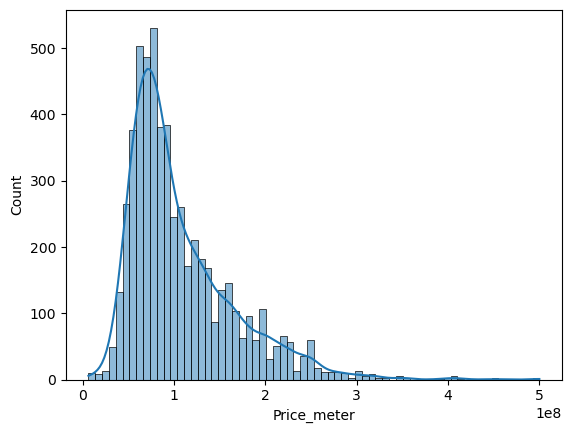

In [119]:
sns.histplot(df["Price_meter"], kde=True)
plt.show()

In [22]:
# sns.pairplot(df,hue="Price_group")
# plt.show()

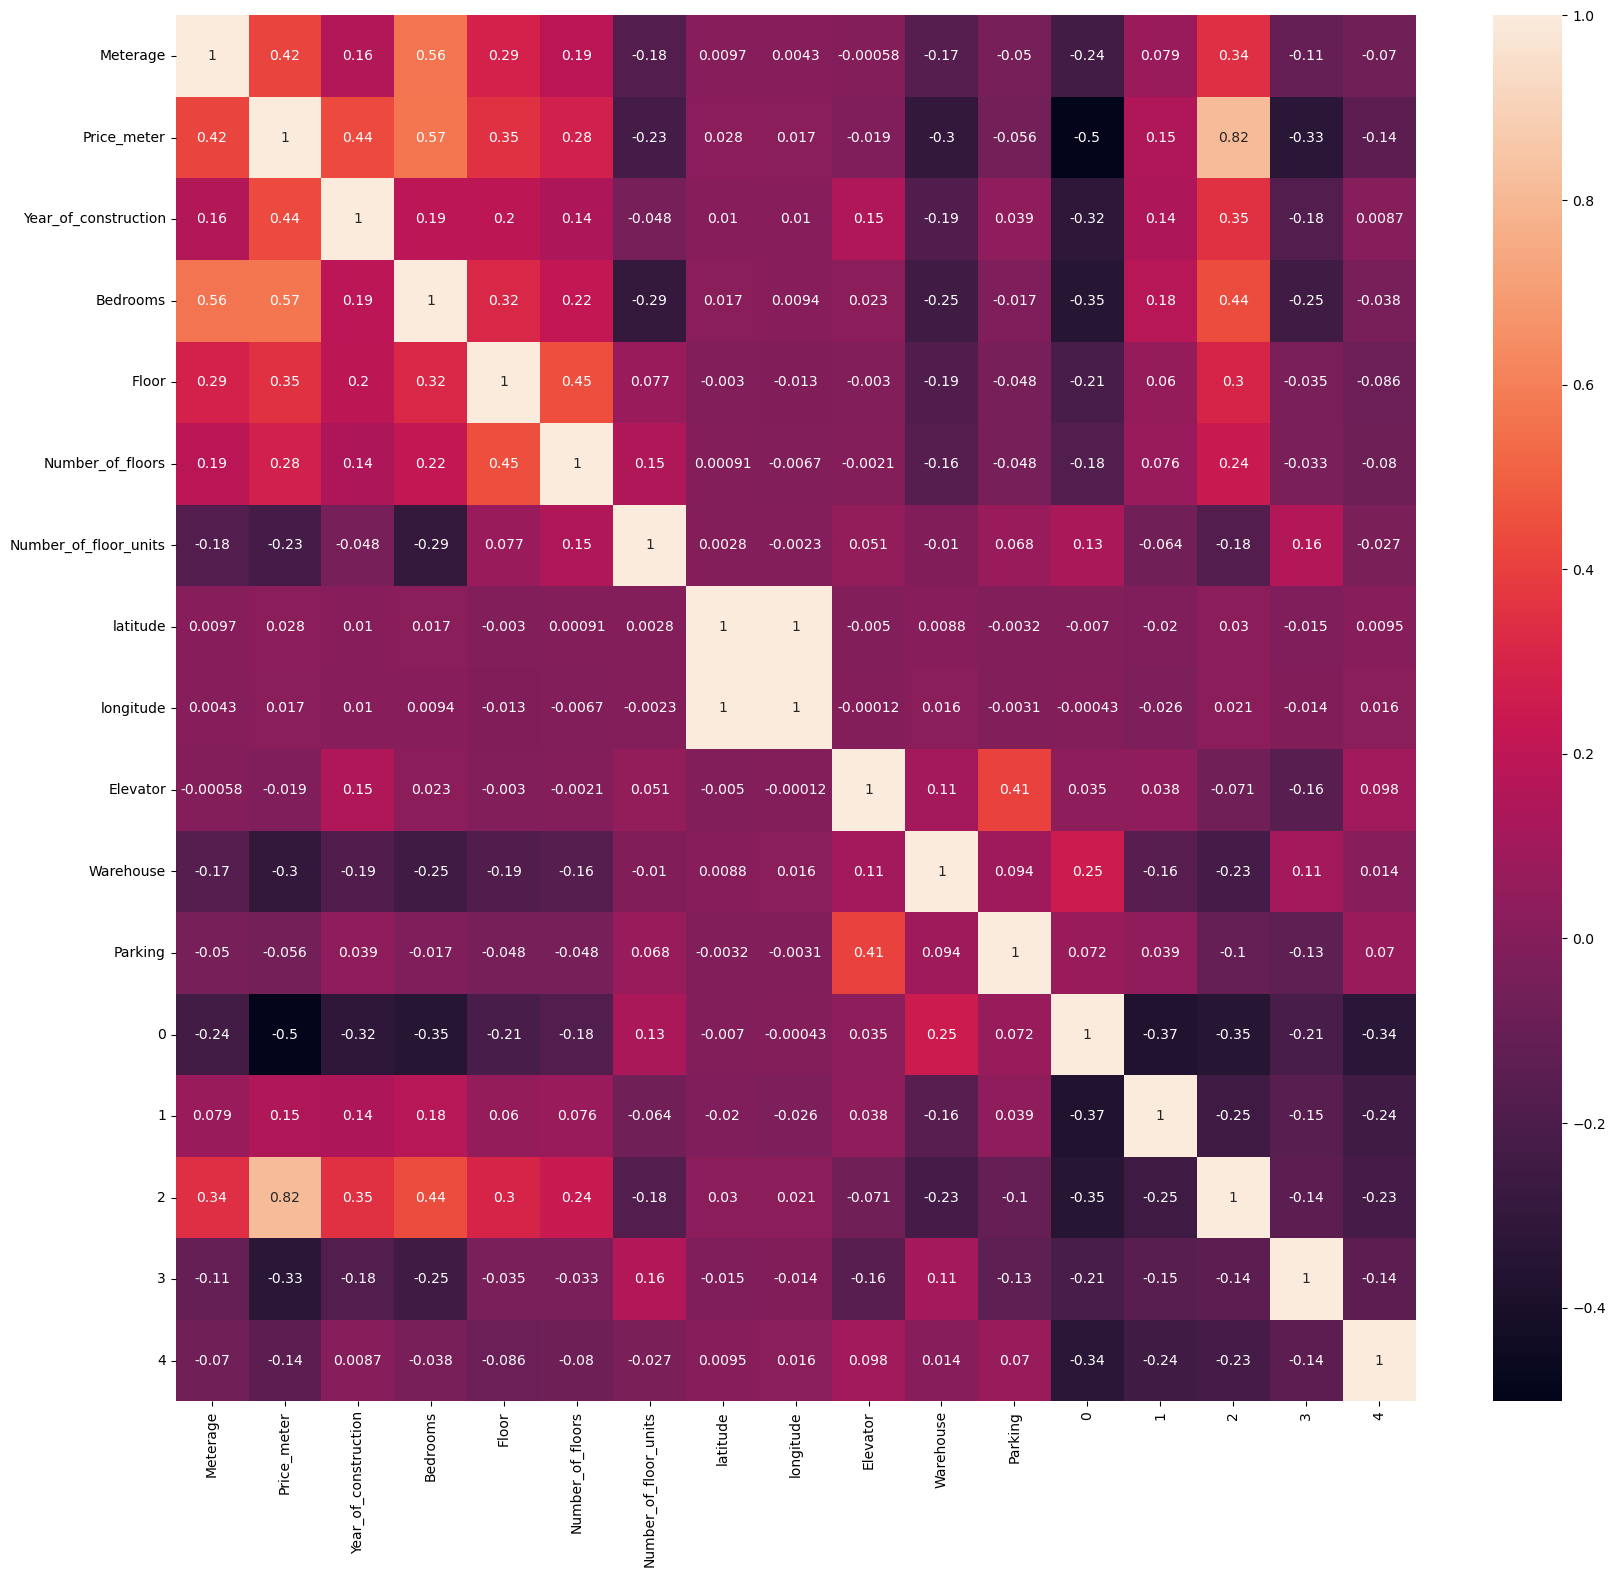

In [120]:
corr_date = df.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corr_date,annot=True)
plt.show()

In [54]:
# df=df.drop(['Parking',"Warehouse",'Elevator','longitude','latitude'],axis=1)
# df.head()

In [95]:
# import hvplot.pandas

In [29]:
# df.drop('Price_meter', axis=1).corrwith(df.Price_meter).hvplot.barh(
#     width=600, height=400, 
#     title="Correlation between Price and Numeric Features", 
#     ylabel='Correlation', xlabel='Numerical Features',
# )


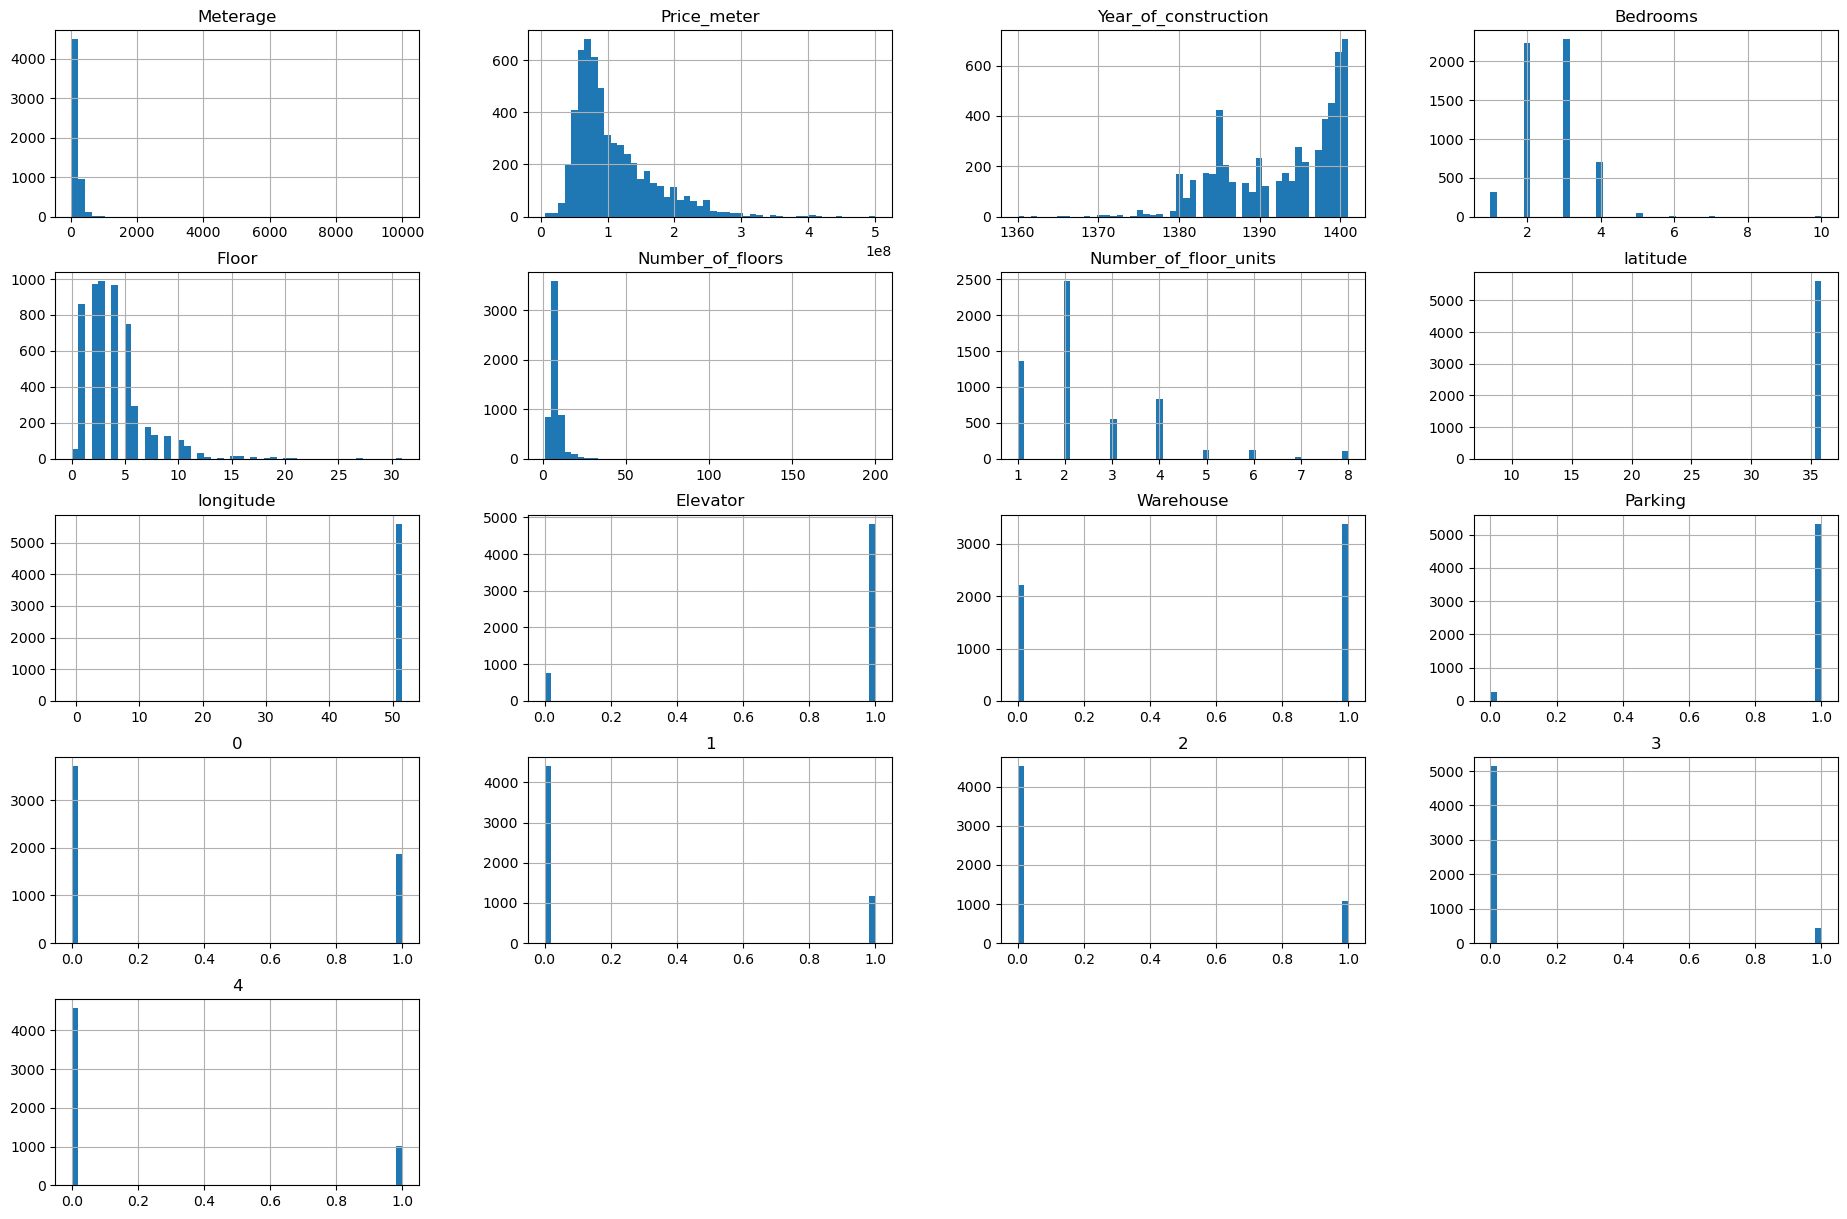

In [96]:
# df.hist(bins=50, figsize=(23,15))
# plt.show()

In [235]:
# sns.set(font_scale=2)
# sns.set_style('whitegrid')

In [132]:
# for feature in df.columns:
#     plt.figure(figsize=(16, 9))
#     sns.scatterplot(data=df, x=feature,y='Price_group',
#                     hue='Price_group', palette='cool', legend=False)
#     plt.show()

## Splitting the dataset into the Training set and Test set

In [121]:
X = df.drop(['Price_meter'],axis=1)
y = df.filter(['Price_meter'],axis=1)

In [67]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y= le.fit_transform(y)
# print(y)

[590 369 365 ... 375 383 614]


/home/sara/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

# Feature Scaling

## Feature scaling with Pipeline

In [127]:
model = make_pipeline(preprocessing.StandardScaler(), LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [128]:
y_predict= model.predict(X_test)

In [129]:
print("MSE (LinearRegression): ", metrics.mean_squared_error(y_test, y_predict))
print("R2_SCORE (LinearRegression): ", metrics.r2_score(y_test, y_predict))
print("MAPE (LinearRegression): ", metrics.mean_absolute_percentage_error(y_test, y_predict))


MSE (LinearRegression):  525340762468132.3
R2_SCORE (LinearRegression):  0.8429428280938215
MAPE (LinearRegression):  0.12739950651258844


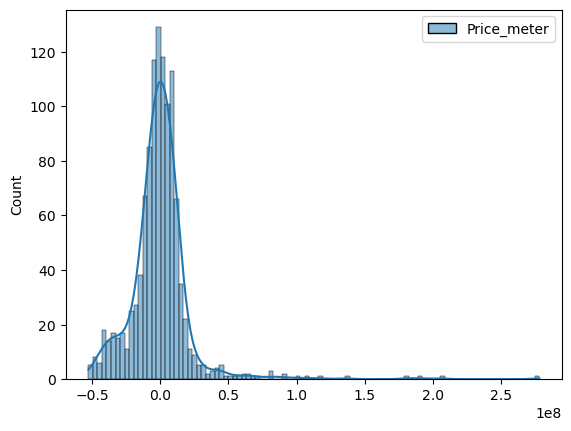

In [130]:
sns.histplot(y_test - y_predict, kde=True)
plt.show()

In [131]:
ridge_poly_model = make_pipeline(preprocessing.StandardScaler(), 
              preprocessing.PolynomialFeatures(degree=1, include_bias=True), 
              Ridge(alpha=0))
ridge_poly_model.fit(X_train, y_train)
y_predict_ridge_poly = ridge_poly_model.predict(X_test)

print("MSE (Ridge + Polynomial): ", metrics.mean_squared_error(y_test, y_predict_ridge_poly))
print("R2_SCORE (Ridge + Polynomial): ", metrics.r2_score(y_test, y_predict_ridge_poly))
print("MAPE (Ridge + Polynomial): ", metrics.mean_absolute_percentage_error(y_test, y_predict_ridge_poly))

MSE (Ridge + Polynomial):  524972969330120.9
R2_SCORE (Ridge + Polynomial):  0.8430527844387873
MAPE (Ridge + Polynomial):  0.12736492766321622
